In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [13]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train[0].shape, y_train[0].shape

((28, 28), ())

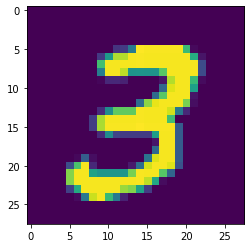

In [6]:
plt.imshow(X_train[7])

In [7]:
y_train[7]

3

In [10]:
def plot_one_img(img_idx=0):
  plt.figure(figsize=(3, 3))
  plt.imshow(X_train[img_idx], cmap=plt.cm.binary)
  plt.title(y_train[img_idx])
  plt.axis(False)
  plt.show()

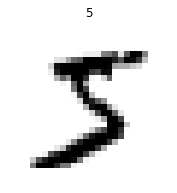

In [11]:
plot_one_img()

In [14]:
print(f"Before normalization: Min: {X_train.min()} -- Max: {X_train.max()}")
xmax = X_train.max()
X_train = X_train / xmax
X_test = X_test / xmax
print(f"After normalization: Min: {X_train.min()} -- Max: {X_train.max()}")

Before normalization: Min: 0 -- Max: 255
After normalization: Min: 0.0 -- Max: 1.0


In [18]:
# DNN Model

# fix the seed
tf.random.set_seed(42)
# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fitting the model
batch_size = 256
epochs = 16
history_1 = model_1.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=0
)

In [19]:
score_1 = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score_1[0]}")
print(f"Test accuracy: {score_1[1]}")

Test loss: 0.08856172114610672
Test accuracy: 0.9745000004768372


In [23]:
# Fitting the best Learning Rate

# fix the seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# lr
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10 ** (epoch / 20)
)

# Fitting the model
batch_size = 256
epochs = 25
history_2 = model_2.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=0, 
    callbacks=[lr_scheduler]
)

In [24]:
df_model2 = pd.DataFrame(history_2.history)
df_model2.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.341465,0.672933,0.601148,0.8705,0.000100
1,0.458509,0.887683,0.351228,0.9100,0.000112
2,0.327016,0.912133,0.286030,0.9195,0.000126
3,0.274229,0.924517,0.249352,0.9302,0.000141
4,0.241030,0.932383,0.223860,0.9360,0.000158


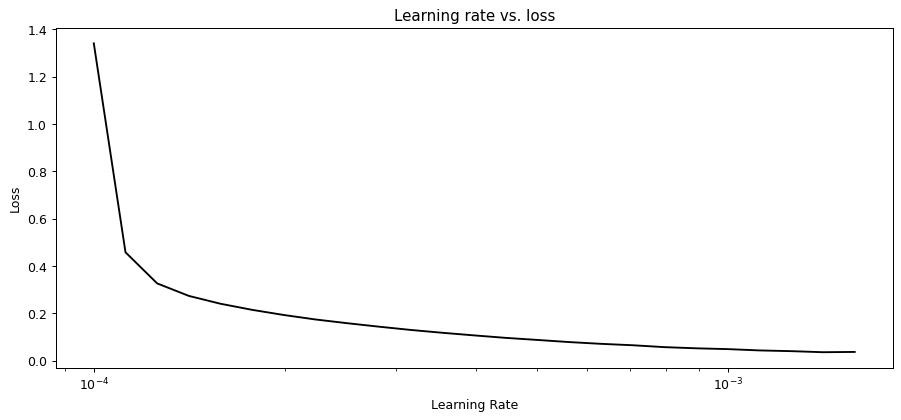

In [25]:
plt.figure(figsize=(12, 5), dpi=90)
plt.semilogx(df_model2.lr, df_model2.loss, c="k")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
plt.show()

In [26]:
# DNN Model

# fix the seed
tf.random.set_seed(42)
# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=4e-3),
    metrics=["accuracy"]
)

# Fitting the model
batch_size = 256
epochs = 16
history_3 = model_3.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=0
)

In [27]:
score_3 = model_3.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score_1[0]}")
print(f"Test accuracy: {score_1[1]}")

Test loss: 0.08856172114610672
Test accuracy: 0.9745000004768372


In [28]:
df_model3 = pd.DataFrame(history_3.history)
df_model3.head()

,loss,accuracy,val_loss,val_accuracy
0,0.279197,0.919200,0.132087,0.9608
1,0.115094,0.965233,0.107919,0.9682
2,0.082353,0.973300,0.101410,0.9700
3,0.059762,0.981150,0.084175,0.9748
4,0.046488,0.985350,0.089344,0.9733


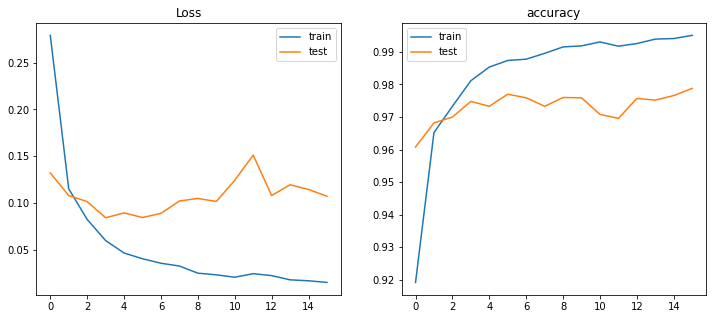

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(df_model3)), df_model3.loss, label="train")
plt.plot(range(len(df_model3)), df_model3.val_loss, label="test")
plt.title("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(len(df_model3)), df_model3.accuracy, label="train")
plt.plot(range(len(df_model3)), df_model3.val_accuracy, label="test")
plt.title("accuracy")
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix

y_sigmoid = model_3.predict(X_test, verbose=0)
y_preds = np.argmax(y_sigmoid, axis=-1)

cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
cm

array([[ 970,    0,    4,    2,    0,    0,    1,    1,    1,    1],
       [   0, 1127,    2,    1,    1,    0,    1,    1,    2,    0],
       [   3,    4, 1007,    3,    1,    0,    0,    4,    9,    1],
       [   0,    1,    3,  985,    0,    6,    0,    3,    8,    4],
       [   0,    0,    4,    0,  957,    0,    3,    2,    1,   15],
       [   3,    1,    0,   11,    1,  853,    5,    1,   11,    6],
       [   2,    4,    2,    1,    5,    4,  936,    0,    4,    0],
       [   2,    2,    8,    1,    0,    1,    0, 1003,    6,    5],
       [   0,    0,    4,    2,    2,    1,    0,    1,  961,    3],
       [   3,    2,    0,    1,    4,    1,    0,    2,    7,  989]])

In [32]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
      y_true: Array of truth labels (must be same shape as y_pred).
      y_pred: Array of predicted labels (must be same shape as y_true).
      classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
      figsize: Size of output figure (default=(10, 10)).
      text_size: Size of output figure text (default=15).
  
    Returns:
      A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
      make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """  
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
        horizontalalignment="center",
        color="white" if cm[i, j] > threshold else "black",
        size=text_size
        )

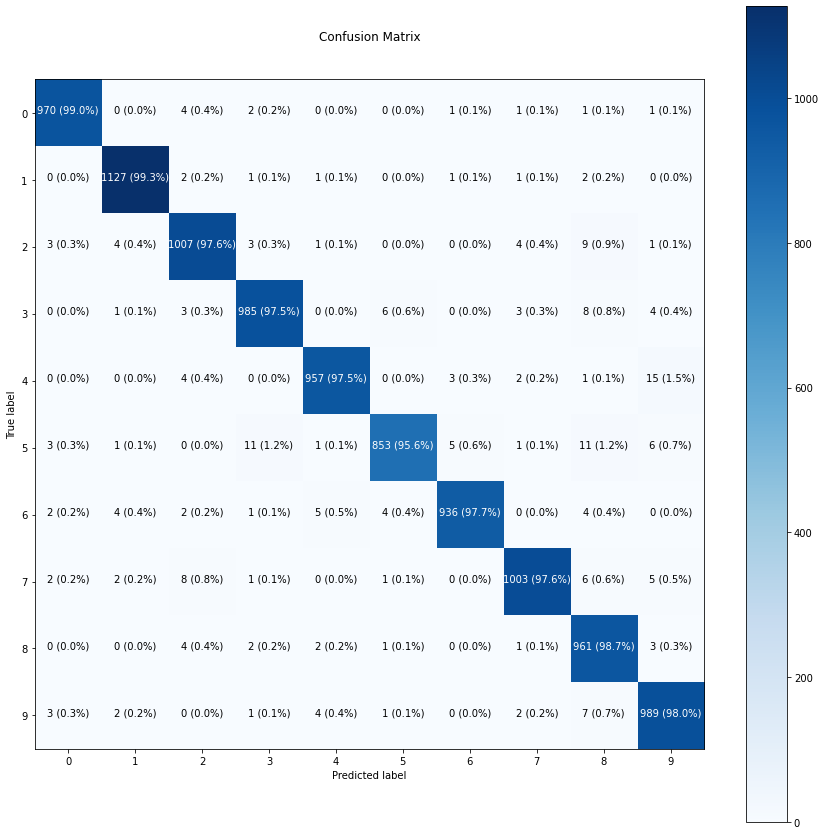

In [33]:
make_confusion_matrix(
    y_true=y_test, 
    y_pred=y_preds,
    figsize=(15, 15),
    text_size=10
)